In [981]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

In [982]:
import pandas as pd
import numpy as np

In [983]:
mlbx=pd.read_csv('./data/mlbxdb.csv')

In [905]:
mlbx.shape

(506695, 165)

In [906]:
#create a variable to help model understand opposite handed hitters have historically done better
mlbx['isoppo']=(mlbx['stand']!=mlbx['p_throws']).astype(int)*1000

In [907]:
mlbx['isoppo'].value_counts()

1000    271807
0       234888
Name: isoppo, dtype: int64

In [908]:
features=['stand','p_throws', 'season','isoppo',
          'hBB%','hK%','hSpd','hPull%','hGB%','hLD%','hFB%','hBABIP','hwOBA','hSoft%', 'hMed%', 'hHard%','hHR/FB',
          'havg_hit_angle','hmax_hit_speed', 'havg_hit_speed', 'hfbld','hgb','hev95percent',
          'pBB%','pK%','pPull%','pGB%','pLD%','pFB%','pBABIP','pSIERA','pSoft%', 'pMed%', 'pHard%','pHR/FB',
          'pavg_hit_angle','pmax_hit_speed', 'pavg_hit_speed', 'pfbld','pgb','pev95percent']

In [909]:
mlbx['event'].value_counts(normalize=True)

GB     0.231350
K      0.209071
1B     0.152180
FB     0.115111
BB     0.085414
LD     0.063058
PU     0.049720
2B     0.046857
HR     0.032923
HBP    0.009623
3B     0.004693
Name: event, dtype: float64

In [910]:
X=mlbx[features]
y=mlbx['event']

In [911]:
#scale x and y data
ss=StandardScaler()
Xsc=ss.fit_transform(X)

In [912]:
#reshape x and y into the proper format to feed to a neural network
y=pd.DataFrame(columns=y.unique()) 
for i in y:
    y[i]=(mlbx['event']==i).astype(int)

In [913]:
y

,GB,2B,1B,K,BB,PU,FB,LD,HR,HBP,3B
0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
506690,0,0,0,0,0,1,0,0,0,0,0
506691,0,0,0,0,0,0,1,0,0,0,0
506692,0,0,1,0,0,0,0,0,0,0,0
506693,0,0,0,0,0,0,1,0,0,0,0


In [914]:
y.shape

(506695, 11)

In [915]:
X.shape

(506695, 41)

In [916]:
X.shape
sh=X.shape[1]

In [917]:
#create neural network
model=Sequential()
model.add(Dense(4_000, activation="relu", input_shape=(sh,)))
model.add(Dropout(.5))
model.add(Dense(800, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(300, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(100, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(20, activation="relu"))
model.add(Dropout(.5))
model.add(Dense(11, activation="softmax"))

In [918]:
#compile model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['categorical_accuracy']
)

In [919]:
model.fit(
    Xsc, y,
    batch_size=512,
    epochs=12,
    validation_split=0.1
)

Epoch 1/12
891/891 [==============================] - 49s 55ms/step - loss: 2.1018 - categorical_accuracy: 0.2391 - val_loss: 2.0495 - val_categorical_accuracy: 0.2691
Epoch 2/12
891/891 [==============================] - 50s 56ms/step - loss: 2.0511 - categorical_accuracy: 0.2607 - val_loss: 2.0431 - val_categorical_accuracy: 0.2685
Epoch 3/12
891/891 [==============================] - 51s 58ms/step - loss: 2.0425 - categorical_accuracy: 0.2643 - val_loss: 2.0402 - val_categorical_accuracy: 0.2688
Epoch 4/12
891/891 [==============================] - 50s 57ms/step - loss: 2.0386 - categorical_accuracy: 0.2649 - val_loss: 2.0377 - val_categorical_accuracy: 0.2678
Epoch 5/12
891/891 [==============================] - 51s 57ms/step - loss: 2.0369 - categorical_accuracy: 0.2666 - val_loss: 2.0375 - val_categorical_accuracy: 0.2686
Epoch 6/12
891/891 [==============================] - 51s 57ms/step - loss: 2.0352 - categorical_accuracy: 0.2666 - val_loss: 2.0382 - val_categorical_accuracy:

In [920]:
#check out one input vector
X.loc[0,:]

stand                0.000
p_throws             0.000
season            2015.000
isoppo               0.000
hBB%                 0.122
hK%                  0.227
hSpd                 3.800
hPull%               0.393
hGB%                 0.297
hLD%                 0.285
hFB%                 0.417
hBABIP               0.321
hwOBA                0.372
hSoft%               0.112
hMed%                0.518
hHard%               0.370
hHR/FB               0.158
havg_hit_angle      17.000
hmax_hit_speed     109.500
havg_hit_speed      88.600
hfbld               91.600
hgb                 83.000
hev95percent        36.100
pBB%                 0.057
pK%                  0.250
pPull%               0.387
pGB%                 0.489
pLD%                 0.218
pFB%                 0.293
pBABIP               0.303
pSIERA               3.190
pSoft%               0.214
pMed%                0.497
pHard%               0.290
pHR/FB               0.099
pavg_hit_angle       8.600
pmax_hit_speed     115.000
p

In [921]:
mlbx.iloc[0,0:12]

pitcher_name        Jon Lester
batter_name     Matt Carpenter
inning_side                top
inning                       1
stand                        0
p_throws                     0
event                       GB
date                2015-04-05
season                    2015
away_team                  sln
home_team                  chn
pitcher_team               chn
Name: 0, dtype: object

In [984]:
#read in initial player statistical data
FH=pd.read_csv('./data/CleanedPlayerData/MergedHitters.csv')
FP=pd.read_csv('./data/CleanedPlayerData/MergedPitchers.csv')

In [923]:
#convert percentage data from a string to usable data format
pctcols=[i for i in FH.columns if '%' in i]
for i in pctcols:
    FH[i]=FH[i].str.replace('%','').astype(float)/100
pctcols=[i for i in FP.columns if '%' in i]
for i in pctcols:
    FP[i]=FP[i].str.replace('%','').astype(float)/100
FH['hHR/FB']=FH['hHR/FB'].str.replace('%','').astype(float)/100
FP['pHR/FB']=FP['pHR/FB'].str.replace('%','').astype(float)/100

In [924]:
def construct_input(atts,parr,harr):
    '''
    This function takes in a descriptive vector, a batter stats vector, and a hitter stats vector, 
    and constructs them into the correct data format to be fed into a fit neural network model to make predictions
    '''
    atts[2]=float(atts[2])
    features=['stand','p_throws', 'season', 'isoppo',
          'hBB%','hK%','hSpd','hPull%','hGB%','hLD%','hFB%','hBABIP','hwOBA','hSoft%', 'hMed%', 'hHard%','hHR/FB',
          'havg_hit_angle','hmax_hit_speed', 'havg_hit_speed', 'hfbld','hgb','hev95percent',
          'pBB%','pK%','pPull%','pGB%','pLD%','pFB%','pBABIP','pSIERA','pSoft%', 'pMed%', 'pHard%','pHR/FB',
          'pavg_hit_angle','pmax_hit_speed', 'pavg_hit_speed', 'pfbld','pgb','pev95percent']
    hfeats=['hBB%','hK%','hSpd','hPull%','hGB%','hLD%','hFB%','hBABIP','hwOBA','hSoft%', 'hMed%', 'hHard%','hHR/FB',
          'havg_hit_angle','hmax_hit_speed', 'havg_hit_speed', 'hfbld','hgb','hev95percent']
    pfeats=['pBB%','pK%','pPull%','pGB%','pLD%','pFB%','pBABIP','pSIERA','pSoft%', 'pMed%', 'pHard%','pHR/FB',
          'pavg_hit_angle','pmax_hit_speed', 'pavg_hit_speed', 'pfbld','pgb','pev95percent']
    data_z=np.zeros((1,4))
    df=pd.DataFrame(data=data_z,columns=features[0:4])
    df.loc[0,'stand']=atts[0]
    df.loc[0,'p_throws']=atts[1]
    df.loc[0,'season']=atts[2]
    df.loc[0,'isoppo']=atts[3]
    for i in hfeats:
        df[i]=harr[i].values
    for i in pfeats:
        df[i]=parr[i].values
    return df

In [947]:
def simAB(pitcher,hitter,ispRH=True,isbRH=True,pseason=2019,hseason=2019,season=2019,output=('probs',0)):
    '''
    This function takes a batter name and a pitcher name and simulates the interaction of those two players. 
    The function requires specification of if either party is left-handed. 
    The function can be customized in the following ways: 
    
    pseason: The season in which the named pitcher's data 
    is pulled from so at bats from past versions of players can be simulated
    
    hseason: Same as above, but for the hitter
    
    season: The season in which the interaction takes place can be specified, as different years have 
    different baseline occurrence rates for each event
    
    output: This tuple formats the output of the function
    Term 1 can be one of three values.
    1. 'probs' will give a probability distribution of each event of the simulated at bat
    2. 'pa' will simulate one plate appearance randomly using the above distribution and give a result
    3. 'statline' will summarize this output into more common baseball statistics
    
    Term 2 is the number of at bats over which this simulation occurs. 
    'probs' will not change regardless of this number 
    '''
    pitcher=FP[(FP['pName']==pitcher)&(FP['pseason']==pseason)]
    hitter=FH[(FH['hName']==hitter)&(FH['hseason']==hseason)]
    atts=[int(isbRH),int(ispRH),season]
    atts.append(int(ispRH!=isbRH)*1000)
    feats_arr=construct_input(atts,pitcher,hitter)
    feats_sc=ss.transform(feats_arr)
    preds=model.predict(feats_sc)
    preds_clean=np.round(preds,3)
    cols=['GB', '2B', '1B', 'K', 'BB', 'PU', 'FB', 'LD', 'HR', 'HBP', '3B']
    if output[0]=='probs':
        df=pd.DataFrame(data=preds_clean,columns=cols)
        return df
    elif output[0]=='statline' or output[0]=='pa':
        p=(preds_clean[0][0::])
        pnew=[round(i,2) for i in p]
        pnew[0]=round(1-np.sum(pnew[1::]),2)
        if output[0]=='pa':
            samps=np.random.choice(a=cols,size=(output[1],1),p=pnew)
            return samps
        elif output[0]=='statline':
            samps=list(np.random.choice(a=cols,size=(output[1]),p=pnew))   
            pa=output[1]
            ab=pa-samps.count('BB')-samps.count('HBP')
            outpa=ab-samps.count('1B')-samps.count('2B')-samps.count('3B')-samps.count('HR')
            ip=float(round(outpa/3,0))+float((outpa%3)/10)
            ba=round((samps.count('1B')+samps.count('2B')+samps.count('3B')+samps.count('HR'))/ab,3)
            hr=samps.count('HR')
            db=samps.count('2B')
            slg=round(((samps.count('1B')+(2*samps.count('2B'))+(3*samps.count('3B'))+(4*samps.count('HR')))/ab),3)
            obp=round((samps.count('1B')+samps.count('2B')+samps.count('3B')+samps.count('HR')+samps.count('BB'))/pa,3)
            ops=round(slg+obp,3)
            babip_pa=pa-samps.count('BB')-samps.count('HBP')-samps.count('K')-samps.count('HR')
            babip=round(((samps.count('1B')+samps.count('2B')+samps.count('3B'))/babip_pa),3)
            k=samps.count('K')
            bb=samps.count('BB')
            whip=round((samps.count('1B')+samps.count('2B')+samps.count('3B')+samps.count('HR')+samps.count('BB'))/ip,2)
            statcols=['PA','BA','HR','2B','SLG','OBP','oPS','BABIP','K','BB','pIP','pWHIP']
            data=[[pa,ba,hr,db,slg,obp,ops,babip,k,bb,ip,whip]]
            df=pd.DataFrame(data=data,columns=statcols)
            return df

In [948]:
simAB('Ryan Carpenter','Anthony Rendon',isbRH=False,output=('statline',6_000))

,PA,BA,HR,2B,SLG,OBP,oPS,BABIP,K,BB,pIP,pWHIP
0,6000,0.261,227,303,0.442,0.32,0.762,0.277,902,496,1339.0,1.43


In [963]:
simAB('Shane Bieber','Miguel Sano',output=('probs',0))

,GB,2B,1B,K,BB,PU,FB,LD,HR,HBP,3B
0,0.197,0.04,0.127,0.298,0.101,0.041,0.098,0.05,0.035,0.01,0.003


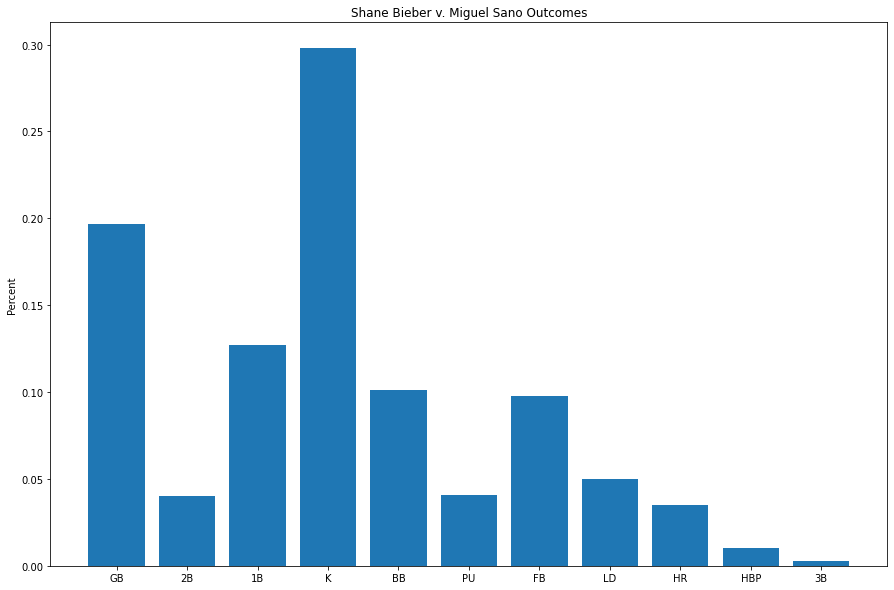

In [973]:
a=list(simAB('Shane Bieber','Miguel Sano',output=('probs',0)).values[0][0::])
c=simAB('Shane Bieber','Miguel Sano',output=('probs',0)).columns
plt.figure(figsize=(15,10))
plt.bar(c,a);
plt.title('Shane Bieber v. Miguel Sano Outcomes')
plt.ylabel('Percent');

In [974]:
simAB('Shane Bieber','Miguel Sano',output=('pa',10))

array([['1B'],
       ['GB'],
       ['BB'],
       ['BB'],
       ['GB'],
       ['PU'],
       ['BB'],
       ['FB'],
       ['GB'],
       ['K']], dtype='<U3')

In [980]:
simAB('Shane Bieber','Miguel Sano',output=('statline',600))

,PA,BA,HR,2B,SLG,OBP,oPS,BABIP,K,BB,pIP,pWHIP
0,600,0.214,33,14,0.426,0.288,0.714,0.257,185,59,140.2,1.23


In [992]:
gamestate_labels=['inning','half','outs','home_runs','away_runs','1stB','2ndB','3rdB']
init_state=[[3,1,1,3,1,0,1,1]]
game=pd.DataFrame(data=init_state,columns=gamestate_labels)
game

,inning,half,outs,home_runs,away_runs,1stB,2ndB,3rdB
0,3,1,1,3,1,0,1,1


In [993]:
afterGBstate=[[3,1,2,4,1,0,0,1]]
gamen=pd.DataFrame(data=afterGBstate,columns=gamestate_labels)
gamen

,inning,half,outs,home_runs,away_runs,1stB,2ndB,3rdB
0,3,1,2,4,1,0,0,1


In [459]:
#def gamesim(l1,l2,p1,p2,pinn1,pinn2)